In [53]:
import concatenated_point_cloud
import pickle
import importlib


In [54]:
importlib.reload(concatenated_point_cloud)

<module 'concatenated_point_cloud' from '/home/jupyter/semantic-abstraction/concatenated_point_cloud.py'>

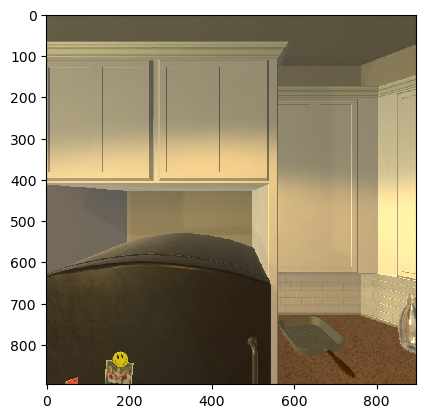

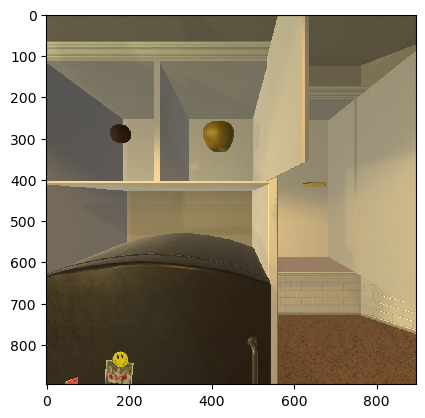

OPEN
[0.00419393 0.00419393 0.00419393 ... 0.00336329 0.00336329 0.00336329]


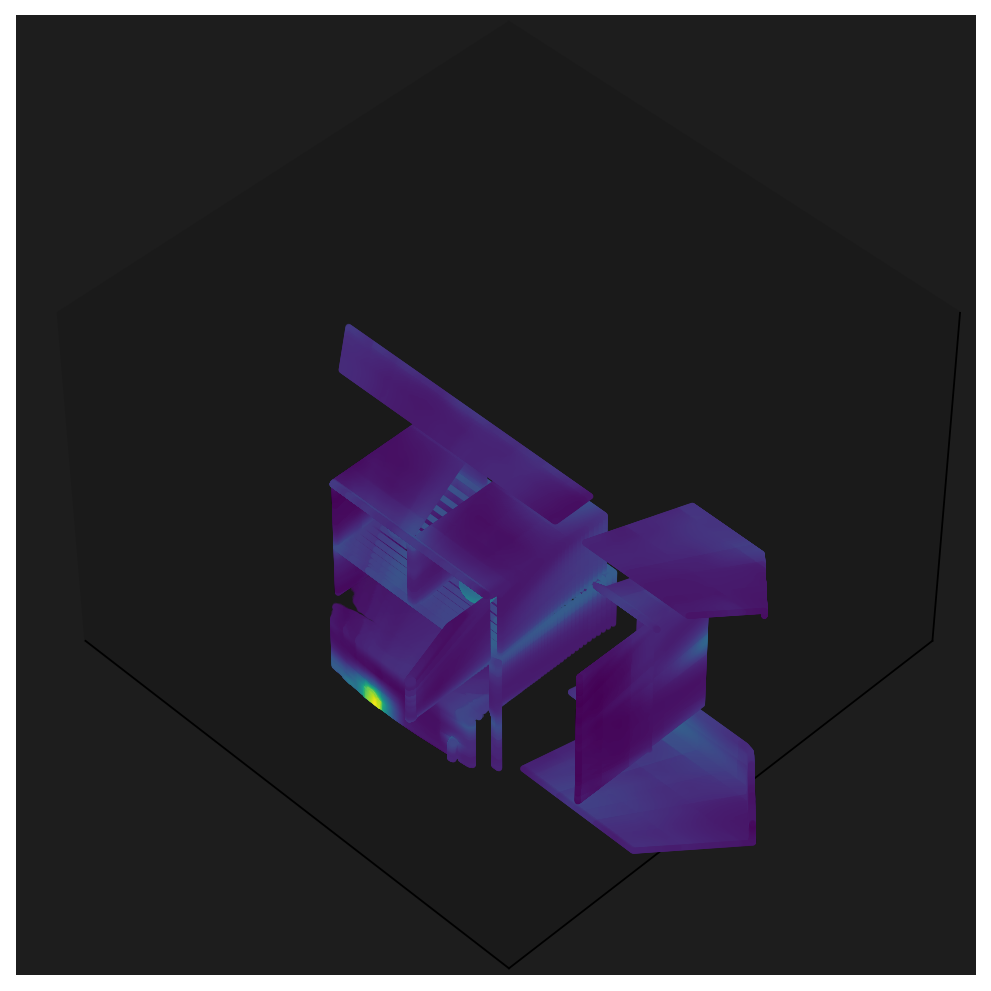

XXXXX
CLOSED
[0.0028181  0.0028181  0.0028181  ... 0.00348726 0.00348726 0.00348726]


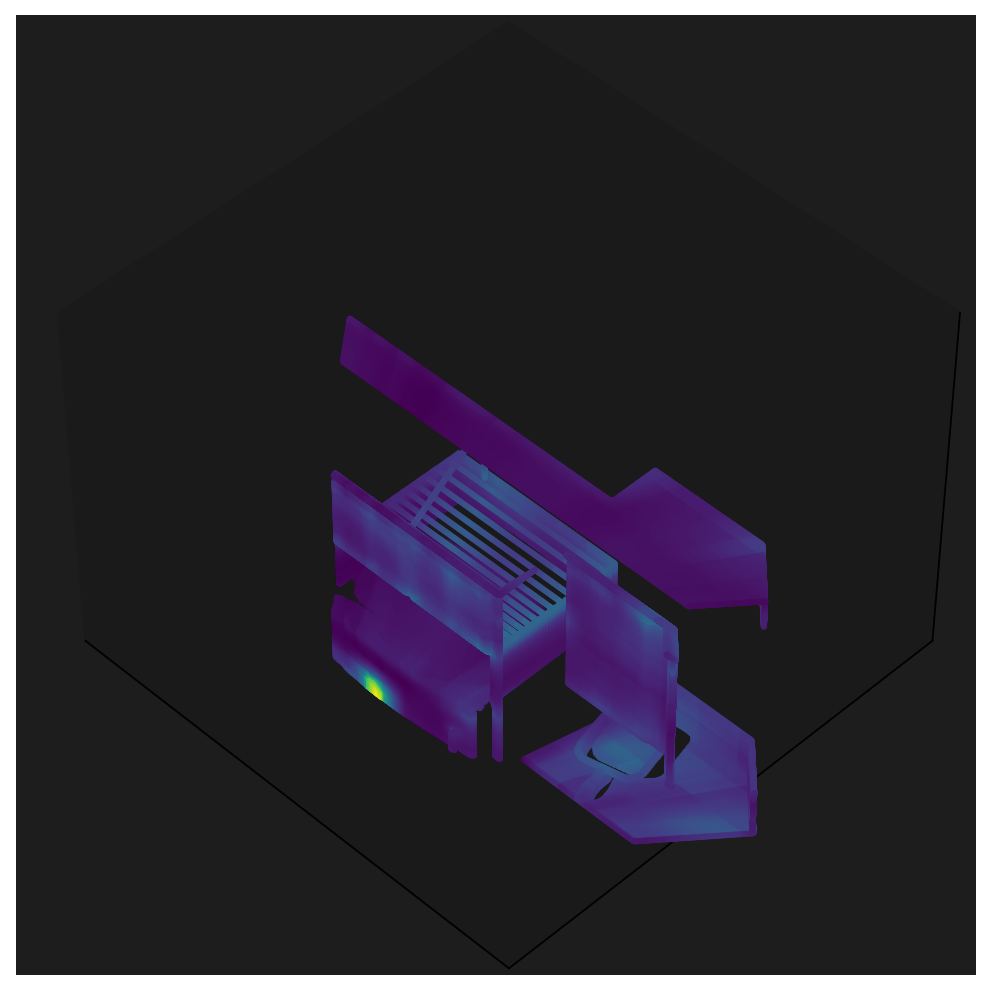

XXXXX
ADDED
[0.00701204 0.00701204 0.00701204 ... 0.00685055 0.00685055 0.00685055]


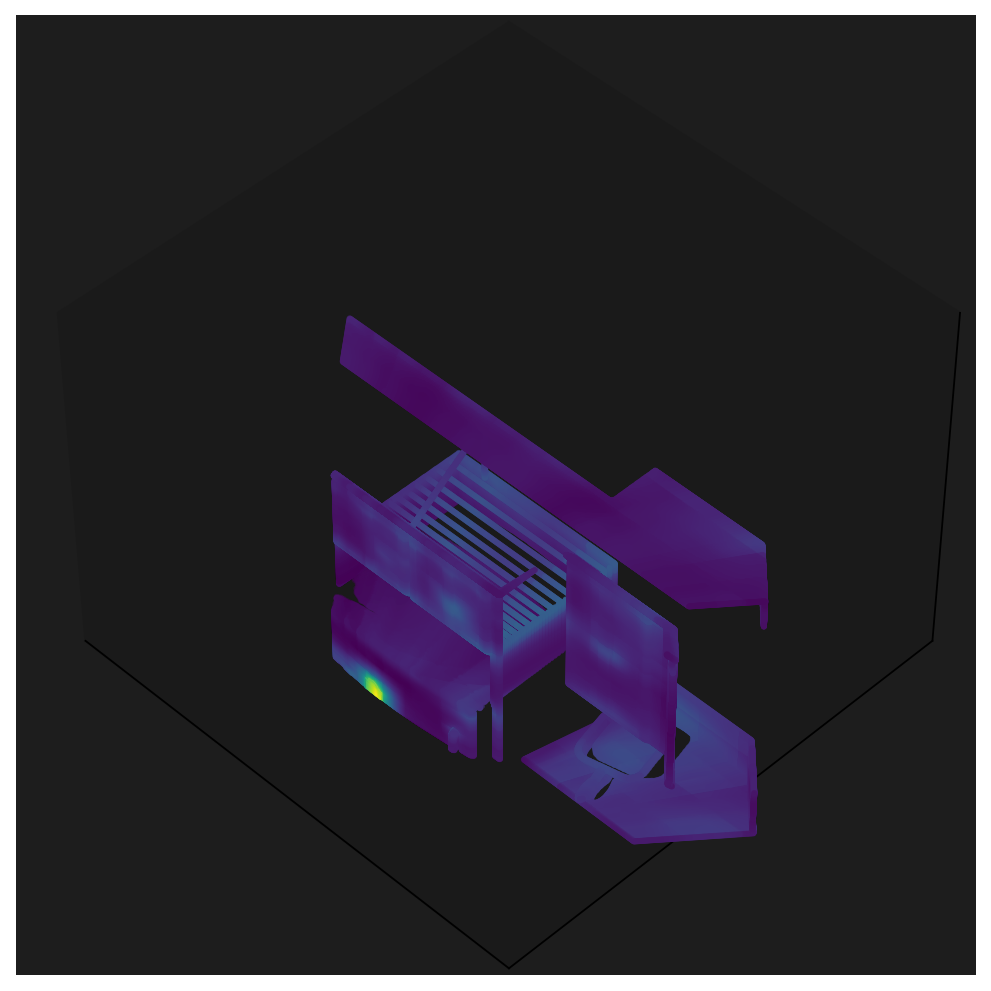

In [56]:
import matplotlib.pyplot as plt 

labels = ["sponge"]    
prompts = ["{} in cabinet"]

file_handle = open('data/data_closed.pkl', 'rb')
data = pickle.load(file_handle)

cam_intr_closed = data["cam_intr"]
cam_pose_closed = data["cam_pose"]
depth_img_closed = data["depth"]
image_closed = data["image"]


plt.imshow(image_closed, interpolation="nearest")
plt.show()



file_handle = open('data/data_open.pkl', 'rb')
data = pickle.load(file_handle)

cam_intr_open = data["cam_intr"]
cam_pose_open = data["cam_pose"]
depth_img_open = data["depth"]
image_open = data["image"]

plt.imshow(image_open, interpolation="nearest")
plt.show()




cam_pts_open = concatenated_point_cloud.return_cam_pts(depth_img_open,cam_intr, cam_pose)
cam_pts_closed = concatenated_point_cloud.return_cam_pts(depth_img_closed,cam_intr, cam_pose)

relevancy_pts_open = concatenated_point_cloud.return_relevancy_pts(image_open, labels, prompts)
relevancy_pts_closed = concatenated_point_cloud.return_relevancy_pts(image_closed, labels, prompts)

print("OPEN")
print(relevancy_pts_open)
concatenated_point_cloud.visualize_point_cloud(cam_pts_open,relevancy_pts_open)

print("XXXXX")


print("CLOSED")
print(relevancy_pts_closed)
concatenated_point_cloud.visualize_point_cloud(cam_pts_closed,relevancy_pts_closed)
print("XXXXX")

relevancy_pts = relevancy_pts_open+relevancy_pts_closed

print("ADDED")
print(relevancy_pts)
concatenated_point_cloud.visualize_point_cloud(cam_pts_closed,relevancy_pts)